In [1]:
from pyfile import eval, eq
from discopy.quantum.zx import Spider, Id
from spiders import Z, Swap, H, CZ, FSwap, X, W

import numpy as np
pi = np.pi

Understand how to bend W outputs to inputs

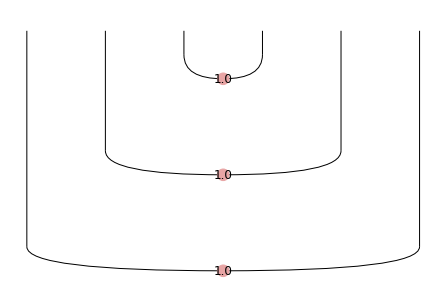

In [2]:
wcup = X(2, 0, 1)

def cup_nest(n):
    if n == 1:
        return wcup
    return Id(1) @ cup_nest(n - 1) @ Id(1) >> wcup

cup_nest(3).draw()

In [3]:
wcup = X(2, 0, 1)

def W2(ins, outs, transpose=True):
    if ins == 1:
        return W(outs, transpose)
    if ins == 0:
        return X(0, 1, 1) >> W(outs, transpose)
        
    w = W(ins + outs - 1, transpose) @ Id(ins - 1) >> Id(outs) @ cup_nest(ins - 1)

    return w.normal_form()
        

In [5]:
W2(2, 2).draw()

AxiomError: W(3, 1) @ Id(1) does not compose with Id(2) @ X(2, 0, 1): cod=2, dom=4.

In [4]:
c = W2(2, 2) >> W2(2, 2)
c.draw()
eval(c)

AxiomError: W(3, 1) @ Id(1) does not compose with Id(2) @ X(2, 0, 1): cod=2, dom=4.

In [6]:
def wm(ins, outs):
    # trying to guess matrix form
    m = np.zeros((2**outs, 2**ins))
    for i in range(2**ins - 1):
        bi = format(i, '0' + str(ins) + 'b')
        if bi.count('0') == 1:
            m[0][i] = 1.0
        
    for j in range(outs): # all powers of 2 
        m[2**j][-1] = 1.0
    return m


In [7]:
wm(2, 3)

array([[0., 1., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [8]:
wm(2, 2)

array([[0., 1., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 0.]])

In [9]:
wm(2, 1).transpose()

array([[0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

Should be working: check that tranpose works

In [13]:
cup, cap = Z(0, 2), Z(2, 0)

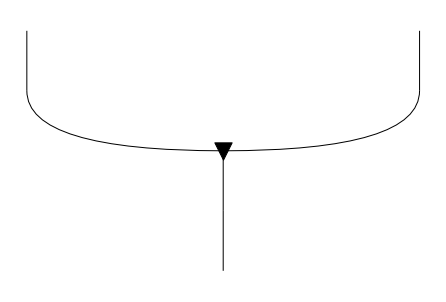

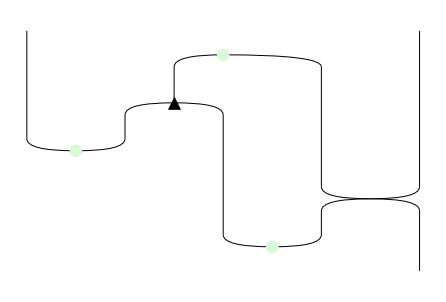

(array([[1., 0., 0., 0.],
        [0., 1., 1., 0.]]),
 array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j, 1.+0.j, 0.+0.j]]),
 array([[1., 0., 0., 0.],
        [0., 1., 1., 0.]]))

In [24]:
a = W(2, 1, True)
b = Id(1) @ cup @ Id(1) >> Id(1) @ W() @ Id(2) >> cap @ Id(1) @ Swap >> cap @ Id(1)
a.draw(),b.normal_form().draw()
eval(a), eval(b), eval(W(1, 2).dagger())

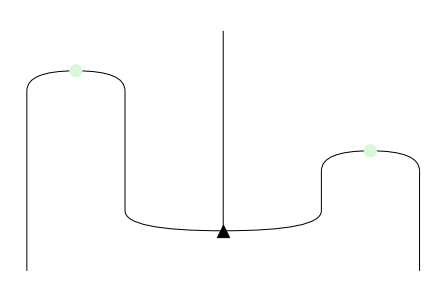

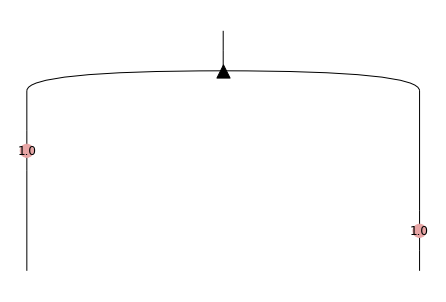

(array([[0.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j],
        [0.+0.j, 1.+0.j],
        [1.+0.j, 0.+0.j]]),
 array([[0.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j],
        [0.+0.j, 1.+0.j],
        [1.+0.j, 0.+0.j]]))

In [32]:
a = cup @ Id(1) @ cup >> Id(1) @ W(3, 0) @ Id(1)
b = W() >> X(1, 1, 1) @ X(1, 1, 1)
a.normal_form().draw(), b.draw()
eval(a), eval(b)

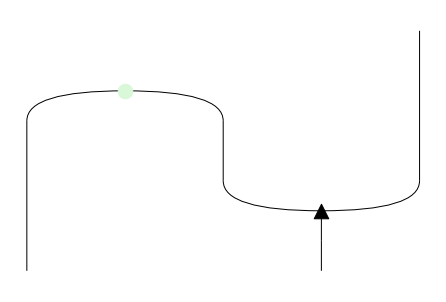

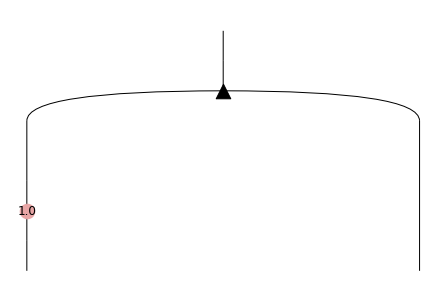

(array([[0.+0.j, 1.+0.j],
        [0.+0.j, 0.+0.j],
        [1.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j]]),
 array([[0.+0.j, 1.+0.j],
        [0.+0.j, 0.+0.j],
        [1.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j]]))

In [37]:
a = cup @ Id(1) >> Id(1) @ W(2, 1) 
b = W() >> X(1, 1, 1) @ Id(1)
a.normal_form().draw(), b.draw()
eval(a), eval(b)